# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Read in clustering dataset, note that this one is still missing the aggregated weather data, but this can easily be added in later

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

In [5]:
df

,Bridge_ID,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,...,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21
0,2.12E+13,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]",...,"[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]","[36.0, 90.5, 50, 1948, 2, 6.5, 3.0]"
1,CALHAN-8TH ST.,"[36.0, 97.0, 428, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.0, 96.9, 955, 1949, 2, 10.9, 7.3]","[36.3, 97.0, 955, 1949, 2, 11.0, 7.0]","[36.3, 96.9, 955, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]","[36.3, 96.9, 983, 1949, 2, 11.0, 7.3]",...,"[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 11.0, 7.3]","[36.3, 97.0, 422, 1949, 2, 9.7, 7.3]","[36.3, 97.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 369, 1949, 2, 9.7, 7.3]","[36.3, 86.0, 522, 1949, 2, 9.7, 7.3]"
2,CSG-C.80-07.65,"[36.0, 83.9, 417, 1970, 2, 6.6, 6.4]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.0, 70.9, 351, 1970, 2, 6.6, 3.0]","[36.3, 76.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 69.0, 351, 1970, 2, 6.6, 3.0]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 66.9, 478, 1970, 2, 6.6, 2.9]",...,"[36.3, 62.9, 478, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 777, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[36.3, 62.9, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 623, 1970, 2, 6.6, 2.9]","[32.7, 55.7, 717, 1970, 2, 6.6, 2.9]"
3,CSG-D.04-10.42,"[36.0, 82.0, 1836, 1955, 2, 7.6, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 4.0]","[36.0, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 83.4, 1459, 1955, 2, 7.7, 3.0]","[36.3, 84.3, 1459, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]","[36.3, 84.4, 1295, 1955, 2, 7.7, 3.4]",...,"[36.3, 72.3, 1295, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1329, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[36.3, 72.3, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 1446, 1955, 2, 7.7, 3.4]","[27.2, 50.2, 2696, 1955, 2, 7.7, 3.4]"
4,CSG-D.37-15.67,"[36.0, 97.0, 87, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.0, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 305, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]","[36.3, 97.0, 397, 1984, 2, 12.8, 3.0]",...,"[36.3, 98.0, 397, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 98.0, 287, 1984, 2, 13.3, 3.0]","[36.3, 99.0, 287, 1984, 2, 12.8, 3.0]","[36.3, 99.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 302, 1984, 2, 12.8, 3.0]","[36.3, 100.0, 268, 1984, 2, 12.8, 3.0]"
...

# For the first row of the dataset, plot the sufficiency rating over time

In [6]:
first_row = df.iloc[1]

In [7]:
first_row = first_row.iloc[1:]

In [8]:
first_row

time_0     [36.0, 97.0, 428, 1949, 2, 10.9, 7.3]
time_1     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_2     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_3     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_4     [36.0, 96.9, 955, 1949, 2, 10.9, 7.3]
time_5     [36.3, 97.0, 955, 1949, 2, 11.0, 7.0]
time_6     [36.3, 96.9, 955, 1949, 2, 11.0, 7.3]
time_7     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_8     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_9     [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_10    [36.3, 96.9, 983, 1949, 2, 11.0, 7.3]
time_11    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_12    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_13    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_14    [36.3, 97.0, 422, 1949, 2, 11.0, 7.3]
time_15     [36.3, 97.0, 422, 1949, 2, 9.7, 7.3]
time_16     [36.3, 97.0, 369, 1949, 2, 9.7, 7.3]
time_17     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_18     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_19     [36.3, 86.0, 369, 1949, 2, 9.7, 7.3]
time_20     [36.3, 8

In [9]:
import re

non_decimal = re.compile(r'[^\d.]+')

list_of_row_components = []

for i, row in first_row.iteritems():
    current_row_components = row.split(', ')
    current_row_components_replaced = []
    
#     print(current_row_components)
    for idx, component in enumerate(current_row_components):
    #     print(first_row_components[idx])
        result = non_decimal.sub('', current_row_components[idx])
        current_row_components_replaced.append(float(result))
        
#     print(current_row_components_replaced)
    list_of_row_components.append(current_row_components_replaced)

In [10]:
first_row = df.iloc[1]

In [11]:
list_of_row_components

[[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3],
 [36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0],
 [36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3],
 [36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3],
 [36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7

In [12]:
first_row = first_row.iloc[1:]

In [13]:
sufficiency_rating_list = []

for row_component in list_of_row_components:
    sufficiency_rating_list.append(row_component[1])

In [14]:
sufficiency_rating_list

[97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 96.9,
 96.9,
 96.9,
 96.9,
 96.9,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 97.0,
 86.0,
 86.0,
 86.0,
 86.0,
 86.0]

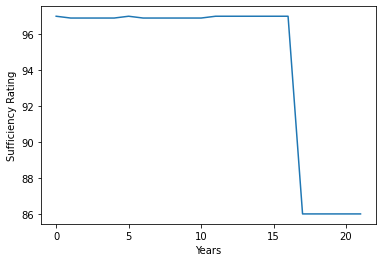

In [15]:
import matplotlib.pyplot as plt

plt.plot(sufficiency_rating_list)
plt.ylabel('Sufficiency Rating')
plt.xlabel('Years')
plt.show()


# Example of first training example

In [16]:
import pandas as pd

var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
varout = []

for element in list_of_row_components:
#     print(element)
    var1.append(element[0])
    var2.append(element[2])
    var3.append(element[3])
    var4.append(element[4])
    var5.append(element[5])
    var6.append(element[6])
    varout.append(element[1])
    
dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

df_temp = pd.DataFrame(dict_temp)

In [17]:
df_temp

,var1,var2,var3,var4,var5,var6,varout
0,36.0,428.0,1949.0,2.0,10.9,7.3,97.0
1,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
2,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
3,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
4,36.0,955.0,1949.0,2.0,10.9,7.3,96.9
5,36.3,955.0,1949.0,2.0,11.0,7.0,97.0
6,36.3,955.0,1949.0,2.0,11.0,7.3,96.9
7,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
8,36.3,983.0,1949.0,2.0,11.0,7.3,96.9
9,36.3,983.0,1949.0,2.0,11.0,7.3,96.9


# Convert each rows into it's own dataframe representing an individual time series example

In [18]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []

for i in range(1, 524):
    
    list_of_row_components = []
    
    current_row = df.iloc[i]
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

    var1 = []
    var2 = []
    var3 = []
    var4 = []
    var5 = []
    var6 = []
    varout = []

    for element in list_of_row_components:

        var1.append(element[0])
        var2.append(element[2])
        var3.append(element[3])
        var4.append(element[4])
        var5.append(element[5])
        var6.append(element[6])
        varout.append(element[1])

    dict_temp = {'var1': var1, 'var2': var2, 'var3': var3, 'var4': var4, 'var5': var5, 'var6': var6, 'varout': varout}

    df_temp = pd.DataFrame(dict_temp)

    list_of_training_df.append(df_temp)

In [19]:
len(list_of_training_df)

523

In [20]:
list_of_training_df[7]

,var1,var2,var3,var4,var5,var6,varout
0,36.0,660.0,1970.0,2.0,11.2,2.4,96.9
1,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
2,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
3,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
4,36.0,950.0,1970.0,2.0,11.1,2.4,96.9
5,36.3,950.0,1970.0,2.0,11.1,2.0,97.0
6,36.3,950.0,1970.0,2.0,11.1,2.4,96.9
7,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
8,36.3,700.0,1970.0,2.0,11.1,2.0,96.9
9,36.3,700.0,1970.0,2.0,11.1,2.6,85.9


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

list_of_scaled_training_df = []
encoder = LabelEncoder()

scaler = MinMaxScaler(feature_range=(0, 1))

for training_df in list_of_training_df:
    temp_df = scaler.fit_transform(training_df)
    list_of_scaled_training_df.append(temp_df)

In [22]:
list_of_scaled_training_df[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.00194932, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

# Single example of a time series example for a single bridge

In [23]:
values = list_of_training_df[7].values

In [24]:
n_train_hours = 21
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(21, 1, 6) (21,) (1, 1, 6) (1,)


# Confirm gpu is being used before training

In [25]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [26]:
get_available_gpus()

['/device:GPU:0']

# Build LSTM model

In [27]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
#     tf.keras.layers.LSTM(30, return_sequences=True),
#     tf.keras.layers.LSTM(100, return_sequences=True),
#     tf.keras.layers.Dense(units=64, activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(units=16, activation='relu'),
#     tf.keras.layers.Dense(units=8, activation='relu'),
#     tf.keras.layers.Dense(units=4, activation='relu'),
#     tf.keras.layers.Dense(units=2, activation='relu'),
#     Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [28]:
lstm_model.compile(loss='mse', optimizer='adam')

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run with min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1790 - val_loss: 8.7180e-05
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1.2925e-05 - val_loss: 2.2483e-05
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.5643 - val_loss: 0.9098
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2448 - val_loss: 1.0770
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0024 - val_loss: 0.0031
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4409 - val_loss: 0.0011
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0017 - val_loss: 0.0022
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0011 - val_loss: 0.0013
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.7298 - val_loss: 0.0012
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1549 - val_loss: 2.2910e-05
EPOCH: 11 OUT OF 1000
(

1/1 - 0s - loss: 0.2736 - val_loss: 0.1674
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2424 - val_loss: 0.2528
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2076 - val_loss: 0.1005
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2126 - val_loss: 0.4145
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2449 - val_loss: 0.0925
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0828 - val_loss: 0.1497
EPOCH: 91 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0420 - val_loss: 0.0176
EPOCH: 92 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2371 - val_loss: 0.2824
EPOCH: 93 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1526 - val_loss: 0.3014
EPOCH: 94 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1912 - val_loss: 0.2800
EPOCH: 95 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1275 - val_

1/1 - 0s - loss: 0.1103 - val_loss: 0.0844
EPOCH: 170 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1325 - val_loss: 0.1301
EPOCH: 171 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1242 - val_loss: 0.0274
EPOCH: 172 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2131 - val_loss: 0.0589
EPOCH: 173 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0990 - val_loss: 0.0387
EPOCH: 174 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0499 - val_loss: 0.0498
EPOCH: 175 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1985 - val_loss: 0.0025
EPOCH: 176 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2255 - val_loss: 0.3372
EPOCH: 177 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1920 - val_loss: 0.1605
EPOCH: 178 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0484 - val_loss: 0.0337
EPOCH: 179 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

1/1 - 0s - loss: 0.2033 - val_loss: 0.1837
EPOCH: 254 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3219 - val_loss: 0.2745
EPOCH: 255 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4214 - val_loss: 0.3844
EPOCH: 256 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2327 - val_loss: 0.1602
EPOCH: 257 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4130 - val_loss: 0.3708
EPOCH: 258 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2388 - val_loss: 0.2037
EPOCH: 259 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2384 - val_loss: 0.2932
EPOCH: 260 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0414 - val_loss: 0.0018
EPOCH: 261 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1430 - val_loss: 0.1495
EPOCH: 262 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0589 - val_loss: 0.0595
EPOCH: 263 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

1/1 - 0s - loss: 0.1985 - val_loss: 0.0254
EPOCH: 338 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0742 - val_loss: 0.0731
EPOCH: 339 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1733 - val_loss: 0.0732
EPOCH: 340 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1223 - val_loss: 0.1553
EPOCH: 341 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2409 - val_loss: 0.1476
EPOCH: 342 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2556 - val_loss: 0.2389
EPOCH: 343 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1331 - val_loss: 0.0740
EPOCH: 344 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1291 - val_loss: 0.0093
EPOCH: 345 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1399 - val_loss: 0.1535
EPOCH: 346 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3173 - val_loss: 0.1166
EPOCH: 347 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2

EPOCH: 421 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1194 - val_loss: 0.1237
EPOCH: 422 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3243 - val_loss: 0.3730
EPOCH: 423 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1512 - val_loss: 0.1328
EPOCH: 424 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0547 - val_loss: 0.0133
EPOCH: 425 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2562 - val_loss: 0.2894
EPOCH: 426 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0893 - val_loss: 0.0884
EPOCH: 427 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2730 - val_loss: 0.2579
EPOCH: 428 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1360 - val_loss: 0.1052
EPOCH: 429 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1622 - val_loss: 0.1796
EPOCH: 430 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2352 - val_loss: 0.3099
EPOCH: 431 OUT OF 10

EPOCH: 505 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1064 - val_loss: 0.0217
EPOCH: 506 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3493 - val_loss: 0.3606
EPOCH: 507 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3467 - val_loss: 0.4291
EPOCH: 508 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.3598 - val_loss: 0.4399
EPOCH: 509 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0955 - val_loss: 0.0026
EPOCH: 510 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1217 - val_loss: 0.2216
EPOCH: 511 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1294 - val_loss: 0.1419
EPOCH: 512 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0979 - val_loss: 0.0669
EPOCH: 513 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1506 - val_loss: 0.1900
EPOCH: 514 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1239 - val_loss: 0.1487
EPOCH: 515 OUT OF 10

1/1 - 0s - loss: 0.0418 - val_loss: 0.0014
EPOCH: 589 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2731 - val_loss: 0.0509
EPOCH: 590 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1208 - val_loss: 0.1171
EPOCH: 591 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0856 - val_loss: 0.0670
EPOCH: 592 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1504 - val_loss: 0.1572
EPOCH: 593 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2070 - val_loss: 0.2219
EPOCH: 594 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2808 - val_loss: 0.3202
EPOCH: 595 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0998 - val_loss: 0.1007
EPOCH: 596 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.4134 - val_loss: 0.4005
EPOCH: 597 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1364 - val_loss: 0.1351
EPOCH: 598 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2

EPOCH: 673 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0927 - val_loss: 5.9008e-04
EPOCH: 674 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1389 - val_loss: 0.2173
EPOCH: 675 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2256 - val_loss: 0.1390
EPOCH: 676 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1208 - val_loss: 0.1395
EPOCH: 677 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1907 - val_loss: 0.2504
EPOCH: 678 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1600 - val_loss: 0.1530
EPOCH: 679 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1003 - val_loss: 0.1003
EPOCH: 680 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1445 - val_loss: 0.0595
EPOCH: 681 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1421 - val_loss: 0.2857
EPOCH: 682 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1422 - val_loss: 0.1261
EPOCH: 683 OUT O

1/1 - 0s - loss: 0.1078 - val_loss: 0.0585
EPOCH: 757 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1680 - val_loss: 0.2329
EPOCH: 758 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1942 - val_loss: 0.1684
EPOCH: 759 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1648 - val_loss: 0.1761
EPOCH: 760 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2117 - val_loss: 0.0766
EPOCH: 761 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2667 - val_loss: 0.0749
EPOCH: 762 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0729 - val_loss: 0.0031
EPOCH: 763 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0545 - val_loss: 0.0325
EPOCH: 764 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0888 - val_loss: 0.0878
EPOCH: 765 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2222 - val_loss: 0.2708
EPOCH: 766 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1

EPOCH: 841 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2347 - val_loss: 0.0599
EPOCH: 842 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1733 - val_loss: 0.3015
EPOCH: 843 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1967 - val_loss: 0.1787
EPOCH: 844 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0627 - val_loss: 0.0508
EPOCH: 845 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1398 - val_loss: 0.0247
EPOCH: 846 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1901 - val_loss: 0.1651
EPOCH: 847 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1271 - val_loss: 0.2155
EPOCH: 848 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2664 - val_loss: 0.3261
EPOCH: 849 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0804 - val_loss: 0.0438
EPOCH: 850 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0714 - val_loss: 1.3389e-05
EPOCH: 851 OUT O

1/1 - 0s - loss: 0.1597 - val_loss: 0.5535
EPOCH: 925 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0248 - val_loss: 3.7976e-04
EPOCH: 926 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0963 - val_loss: 0.0955
EPOCH: 927 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1675 - val_loss: 0.1164
EPOCH: 928 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.0251 - val_loss: 2.9514e-04
EPOCH: 929 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2275 - val_loss: 0.1846
EPOCH: 930 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1165 - val_loss: 0.0177
EPOCH: 931 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1512 - val_loss: 0.4780
EPOCH: 932 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.1353 - val_loss: 0.2730
EPOCH: 933 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 0.2574 - val_loss: 0.1356
EPOCH: 934 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - l

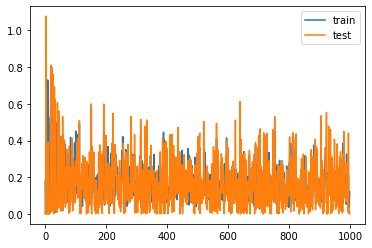

In [29]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_scaled_training_df[rand_int]

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    lstm_model.reset_states()
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [30]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#     print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
#     print(yhat[0][0][0])
#     print(test_y[0])
    
#     difference = test_y[0] - yhat[0][0][0]
#     squared_difference = difference**2
#     summation = summation + squared_difference
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [31]:
rmse

81.19583306949075

# Because we have individual time series for each bridge, we define an epoch number and for each epoch we train the model an a random bridge time series

# At the end, we plot the loss and validation loss over time

# This experiment is run without min max scaling

EPOCH: 1 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6985.9404 - val_loss: 5168.0601
EPOCH: 2 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3866.8496 - val_loss: 2019.3776
EPOCH: 3 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5114.0806 - val_loss: 5345.6523
EPOCH: 4 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4214.6040 - val_loss: 3489.0332
EPOCH: 5 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9364.2568 - val_loss: 9349.8330
EPOCH: 6 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6848.4492 - val_loss: 6105.0488
EPOCH: 7 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9348.8926 - val_loss: 9342.8262
EPOCH: 8 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2534.4614 - val_loss: 2511.4602
EPOCH: 9 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6541.3213 - val_loss: 6631.6216
EPOCH: 10 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8372.7012 -

EPOCH: 81 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6499.2856 - val_loss: 6497.3105
EPOCH: 82 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7659.1958 - val_loss: 8611.2520
EPOCH: 83 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4369.6211 - val_loss: 4419.8892
EPOCH: 84 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1586.8110 - val_loss: 1731.3474
EPOCH: 85 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6968.0757 - val_loss: 6865.6025
EPOCH: 86 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7891.6445 - val_loss: 8018.4419
EPOCH: 87 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6441.3398 - val_loss: 6485.3867
EPOCH: 88 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3142.3110 - val_loss: 3406.4832
EPOCH: 89 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8416.5635 - val_loss: 8126.6626
EPOCH: 90 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 81

EPOCH: 160 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3919.8828 - val_loss: 3915.4580
EPOCH: 161 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5011.6709 - val_loss: 5156.8345
EPOCH: 162 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 9156.6924 - val_loss: 9162.6572
EPOCH: 163 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8046.5698 - val_loss: 7894.7573
EPOCH: 164 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8380.3457 - val_loss: 9215.1494
EPOCH: 165 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6618.6523 - val_loss: 6673.2251
EPOCH: 166 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2146.2861 - val_loss: 2177.3481
EPOCH: 167 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8217.0928 - val_loss: 8178.4653
EPOCH: 168 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3057.0840 - val_loss: 3022.8621
EPOCH: 169 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 239 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6076.7559 - val_loss: 3977.1753
EPOCH: 240 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1724.1115 - val_loss: 1592.8906
EPOCH: 241 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2761.8115 - val_loss: 1226.1509
EPOCH: 242 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7887.3149 - val_loss: 7696.5293
EPOCH: 243 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7647.0273 - val_loss: 7614.7554
EPOCH: 244 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5501.5640 - val_loss: 5566.0308
EPOCH: 245 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7735.9790 - val_loss: 7709.9004
EPOCH: 246 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6228.4150 - val_loss: 3229.4285
EPOCH: 247 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7689.6665 - val_loss: 8410.8135
EPOCH: 248 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 318 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3644.8933 - val_loss: 3082.3328
EPOCH: 319 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2543.3777 - val_loss: 1079.7764
EPOCH: 320 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1982.4855 - val_loss: 3274.3481
EPOCH: 321 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4090.1355 - val_loss: 3895.6003
EPOCH: 322 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 7324.9956 - val_loss: 7325.3940
EPOCH: 323 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 889.6875 - val_loss: 478.0006
EPOCH: 324 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5903.8223 - val_loss: 5902.4316
EPOCH: 325 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6012.3901 - val_loss: 6008.3730
EPOCH: 326 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5892.5488 - val_loss: 6023.1250
EPOCH: 327 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - 

EPOCH: 397 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 8138.4746 - val_loss: 8158.6504
EPOCH: 398 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6614.0835 - val_loss: 6606.3677
EPOCH: 399 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4918.7261 - val_loss: 4977.8315
EPOCH: 400 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6452.1177 - val_loss: 6266.5117
EPOCH: 401 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6884.4404 - val_loss: 6960.7480
EPOCH: 402 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6433.7305 - val_loss: 6021.6968
EPOCH: 403 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1006.9870 - val_loss: 856.7011
EPOCH: 404 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5419.5845 - val_loss: 5413.3184
EPOCH: 405 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6047.8008 - val_loss: 7007.6870
EPOCH: 406 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s -

EPOCH: 476 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6872.5181 - val_loss: 6529.0078
EPOCH: 477 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3452.2798 - val_loss: 2935.8420
EPOCH: 478 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 917.0848 - val_loss: 916.2394
EPOCH: 479 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 499.4285 - val_loss: 475.4710
EPOCH: 480 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6375.0542 - val_loss: 6215.6631
EPOCH: 481 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1554.3583 - val_loss: 1267.3479
EPOCH: 482 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6773.2769 - val_loss: 6786.1157
EPOCH: 483 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6953.3862 - val_loss: 7270.2163
EPOCH: 484 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3371.8110 - val_loss: 3489.8833
EPOCH: 485 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - lo

EPOCH: 555 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2162.0237 - val_loss: 2145.9382
EPOCH: 556 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6390.3867 - val_loss: 6000.8350
EPOCH: 557 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3880.4758 - val_loss: 3877.6489
EPOCH: 558 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3762.1335 - val_loss: 3751.2214
EPOCH: 559 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6181.8975 - val_loss: 6323.7808
EPOCH: 560 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5080.1636 - val_loss: 5103.4146
EPOCH: 561 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5093.8862 - val_loss: 5098.7695
EPOCH: 562 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6175.4507 - val_loss: 5747.0630
EPOCH: 563 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5639.1206 - val_loss: 5745.4092
EPOCH: 564 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 634 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 723.3798 - val_loss: 240.3602
EPOCH: 635 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4046.3936 - val_loss: 4218.2534
EPOCH: 636 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4685.0454 - val_loss: 2908.8025
EPOCH: 637 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5310.7871 - val_loss: 6359.6514
EPOCH: 638 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3616.7964 - val_loss: 3614.1313
EPOCH: 639 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3223.7644 - val_loss: 1361.2461
EPOCH: 640 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1699.3744 - val_loss: 984.2530
EPOCH: 641 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4541.5977 - val_loss: 7370.8706
EPOCH: 642 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4390.4946 - val_loss: 3847.5730
EPOCH: 643 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - l

EPOCH: 713 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5576.8525 - val_loss: 6559.3452
EPOCH: 714 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4341.4639 - val_loss: 4339.1616
EPOCH: 715 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3166.5034 - val_loss: 3112.6501
EPOCH: 716 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5460.1113 - val_loss: 5223.6660
EPOCH: 717 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4531.7930 - val_loss: 4483.4717
EPOCH: 718 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 6453.9971 - val_loss: 6339.8394
EPOCH: 719 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4377.7104 - val_loss: 4327.8232
EPOCH: 720 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4188.4648 - val_loss: 4299.2788
EPOCH: 721 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3100.2878 - val_loss: 2829.4893
EPOCH: 722 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 792 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1855.0997 - val_loss: 1469.5938
EPOCH: 793 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5107.7368 - val_loss: 5125.3745
EPOCH: 794 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4981.2524 - val_loss: 5108.6055
EPOCH: 795 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2170.4893 - val_loss: 2168.0710
EPOCH: 796 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5083.7935 - val_loss: 3369.2285
EPOCH: 797 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5076.6777 - val_loss: 5553.3560
EPOCH: 798 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5646.1348 - val_loss: 5853.2236
EPOCH: 799 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5480.0894 - val_loss: 5398.4097
EPOCH: 800 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1936.9568 - val_loss: 1926.2115
EPOCH: 801 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

EPOCH: 871 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 2964.9905 - val_loss: 2963.6079
EPOCH: 872 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4096.9873 - val_loss: 4171.5908
EPOCH: 873 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1831.2810 - val_loss: 45.5466
EPOCH: 874 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4472.6973 - val_loss: 4453.5991
EPOCH: 875 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5416.5693 - val_loss: 5639.3350
EPOCH: 876 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5287.1240 - val_loss: 5314.9453
EPOCH: 877 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1828.0234 - val_loss: 44.8979
EPOCH: 878 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3024.0833 - val_loss: 1191.3231
EPOCH: 879 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 964.6669 - val_loss: 94.5815
EPOCH: 880 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss:

EPOCH: 950 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1439.7316 - val_loss: 1281.5195
EPOCH: 951 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4857.7988 - val_loss: 4826.7212
EPOCH: 952 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3325.8828 - val_loss: 3313.2781
EPOCH: 953 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5097.2739 - val_loss: 4140.2222
EPOCH: 954 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 1567.9581 - val_loss: 1129.9086
EPOCH: 955 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5854.9990 - val_loss: 5855.1895
EPOCH: 956 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 4511.3477 - val_loss: 4955.2935
EPOCH: 957 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 3417.3254 - val_loss: 4676.6777
EPOCH: 958 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s - loss: 5631.8740 - val_loss: 5986.0073
EPOCH: 959 OUT OF 1000
(21, 1, 6) (21,) (1, 1, 6) (1,)
1/1 - 0s 

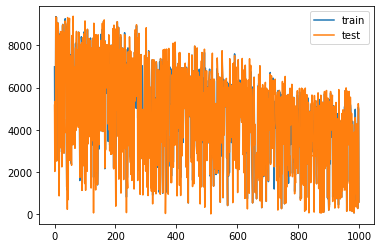

In [32]:
from matplotlib import pyplot
import random

EPOCHS = 1000

losses = []
val_losses = []

for a in range(EPOCHS):
    
    print('EPOCH: ' + str(a+1) +  ' OUT OF ' + str(EPOCHS))

    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

    # fit network
    history = lstm_model.fit(train_X, train_y, epochs=1, batch_size=21, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    for idx, h in enumerate(history.history['loss']):
        losses.append(h)
        val_losses.append(history.history['val_loss'])
        
# plot history
pyplot.plot(losses, label='train')
pyplot.plot(val_losses, label='test')
pyplot.legend()
pyplot.show()

# Based on the num_predictions we choose, we predict on that many random time series and derive a resulting root mean square error

# The resulting prediction is sufficiency rating

In [33]:
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import math

num_predictions = 500

summation = 0

actual = []
predicted = []

for a in range(num_predictions):
    
    rand_int = random.randint(0, 522)

    values = list_of_training_df[rand_int].values

    n_train_hours = 21
    train = values[:n_train_hours, :]
    test = values[n_train_hours:, :]

    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    yhat = lstm_model.predict(test_X)
    
    actual.append(test_y[0])
    predicted.append(yhat[0][0][0])
    
mse = mean_squared_error(actual, predicted)
rmse = math.sqrt(mse)

In [34]:
rmse

56.83066305892791

In [35]:
predicted

[21.32262,
 29.444675,
 24.349876,
 26.93787,
 29.444675,
 22.463615,
 22.463615,
 24.349876,
 29.444675,
 21.32262,
 29.444675,
 24.349876,
 24.349876,
 29.444675,
 25.892162,
 20.083782,
 29.444675,
 29.444675,
 24.349876,
 29.444675,
 24.349876,
 21.32262,
 17.456476,
 20.083782,
 29.444675,
 20.083782,
 26.94178,
 25.25085,
 21.32262,
 24.349876,
 24.349876,
 29.444675,
 29.444675,
 21.32262,
 29.444675,
 20.083782,
 29.444675,
 20.083782,
 29.444675,
 22.463615,
 20.083782,
 24.349876,
 24.349876,
 26.93787,
 24.349876,
 21.32262,
 24.349876,
 22.463615,
 24.349876,
 21.32262,
 29.444675,
 22.463615,
 20.083782,
 26.937172,
 29.444675,
 29.444675,
 27.822037,
 25.25085,
 29.444675,
 24.349876,
 22.473171,
 29.444675,
 20.083782,
 29.444675,
 29.444672,
 20.083782,
 29.444675,
 21.32262,
 29.444675,
 20.083782,
 25.251076,
 26.912819,
 29.444675,
 29.444675,
 29.444675,
 29.444675,
 29.444675,
 25.892162,
 29.444675,
 22.463615,
 24.349876,
 25.25085,
 24.349876,
 29.444675,
 22.46

# Start of second method of lstm time series forecasting

In [36]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [37]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [38]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [39]:
for i in range(22):
    print(list_of_row_components[i])

[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]
[74.1, 74.1, 74.1, 74.1, 74.1, 74.1, 74.1]


# Get length of list of lists

In [40]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [41]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [45]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [46]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

# Perform train test split for dataset

In [48]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [49]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# Build LSTM model

In [50]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, dropout=0.2, recurrent_dropout=0.2, input_shape=(train_X.shape[1], train_X.shape[2])),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [51]:
lstm_model.compile(loss='mae', optimizer='adam')

# Train model

In [52]:
history = lstm_model.fit(train_X, train_y, epochs=1000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/1000
5/5 - 0s - loss: 73.6973 - val_loss: 73.1344
Epoch 2/1000
5/5 - 0s - loss: 72.9007 - val_loss: 72.1515
Epoch 3/1000
5/5 - 0s - loss: 71.9611 - val_loss: 71.2323
Epoch 4/1000
5/5 - 0s - loss: 70.9850 - val_loss: 70.2164
Epoch 5/1000
5/5 - 0s - loss: 69.7848 - val_loss: 68.7249
Epoch 6/1000
5/5 - 0s - loss: 68.3176 - val_loss: 67.2149
Epoch 7/1000
5/5 - 0s - loss: 66.9212 - val_loss: 66.0152
Epoch 8/1000
5/5 - 0s - loss: 65.3434 - val_loss: 64.2352
Epoch 9/1000
5/5 - 0s - loss: 63.5148 - val_loss: 61.8360
Epoch 10/1000
5/5 - 0s - loss: 61.2033 - val_loss: 58.7129
Epoch 11/1000
5/5 - 0s - loss: 58.2940 - val_loss: 55.6339
Epoch 12/1000
5/5 - 0s - loss: 55.1429 - val_loss: 51.8396
Epoch 13/1000
5/5 - 0s - loss: 51.5913 - val_loss: 47.7569
Epoch 14/1000
5/5 - 0s - loss: 48.0609 - val_loss: 43.4411
Epoch 15/1000
5/5 - 0s - loss: 44.0178 - val_loss: 39.2845
Epoch 16/1000
5/5 - 0s - loss: 39.8317 - val_loss: 35.4190
Epoch 17/1000
5/5 - 0s - loss: 35.6140 - val_loss: 31.5734
Epoch 

Epoch 144/1000
5/5 - 0s - loss: 0.0790 - val_loss: 0.0587
Epoch 145/1000
5/5 - 0s - loss: 0.0524 - val_loss: 0.1155
Epoch 146/1000
5/5 - 0s - loss: 0.1008 - val_loss: 0.0610
Epoch 147/1000
5/5 - 0s - loss: 0.0697 - val_loss: 0.0032
Epoch 148/1000
5/5 - 0s - loss: 0.0215 - val_loss: 0.0366
Epoch 149/1000
5/5 - 0s - loss: 0.0648 - val_loss: 0.0462
Epoch 150/1000
5/5 - 0s - loss: 0.0324 - val_loss: 0.0179
Epoch 151/1000
5/5 - 0s - loss: 0.0289 - val_loss: 0.0097
Epoch 152/1000
5/5 - 0s - loss: 0.0373 - val_loss: 0.0578
Epoch 153/1000
5/5 - 0s - loss: 0.0661 - val_loss: 0.0511
Epoch 154/1000
5/5 - 0s - loss: 0.0874 - val_loss: 0.0476
Epoch 155/1000
5/5 - 0s - loss: 0.0415 - val_loss: 0.0628
Epoch 156/1000
5/5 - 0s - loss: 0.0830 - val_loss: 0.1136
Epoch 157/1000
5/5 - 0s - loss: 0.0609 - val_loss: 0.0683
Epoch 158/1000
5/5 - 0s - loss: 0.0835 - val_loss: 0.1135
Epoch 159/1000
5/5 - 0s - loss: 0.1152 - val_loss: 0.2286
Epoch 160/1000
5/5 - 0s - loss: 0.1556 - val_loss: 0.0753
Epoch 161/1000

5/5 - 0s - loss: 0.0742 - val_loss: 0.1793
Epoch 286/1000
5/5 - 0s - loss: 0.1312 - val_loss: 0.1853
Epoch 287/1000
5/5 - 0s - loss: 0.1146 - val_loss: 0.0063
Epoch 288/1000
5/5 - 0s - loss: 0.1137 - val_loss: 0.1269
Epoch 289/1000
5/5 - 0s - loss: 0.1651 - val_loss: 0.0810
Epoch 290/1000
5/5 - 0s - loss: 0.0477 - val_loss: 0.0395
Epoch 291/1000
5/5 - 0s - loss: 0.0490 - val_loss: 0.0089
Epoch 292/1000
5/5 - 0s - loss: 0.0985 - val_loss: 0.1664
Epoch 293/1000
5/5 - 0s - loss: 0.1958 - val_loss: 0.1631
Epoch 294/1000
5/5 - 0s - loss: 0.2095 - val_loss: 0.1572
Epoch 295/1000
5/5 - 0s - loss: 0.2229 - val_loss: 0.0937
Epoch 296/1000
5/5 - 0s - loss: 0.1566 - val_loss: 0.1823
Epoch 297/1000
5/5 - 0s - loss: 0.2238 - val_loss: 0.1134
Epoch 298/1000
5/5 - 0s - loss: 0.1678 - val_loss: 0.1887
Epoch 299/1000
5/5 - 0s - loss: 0.2509 - val_loss: 0.0722
Epoch 300/1000
5/5 - 0s - loss: 0.1421 - val_loss: 0.0632
Epoch 301/1000
5/5 - 0s - loss: 0.0505 - val_loss: 0.0082
Epoch 302/1000
5/5 - 0s - los

Epoch 427/1000
5/5 - 0s - loss: 0.0424 - val_loss: 0.0459
Epoch 428/1000
5/5 - 0s - loss: 0.0257 - val_loss: 0.0030
Epoch 429/1000
5/5 - 0s - loss: 0.0450 - val_loss: 0.0088
Epoch 430/1000
5/5 - 0s - loss: 0.0914 - val_loss: 0.0654
Epoch 431/1000
5/5 - 0s - loss: 0.0469 - val_loss: 0.0649
Epoch 432/1000
5/5 - 0s - loss: 0.0710 - val_loss: 0.0754
Epoch 433/1000
5/5 - 0s - loss: 0.0712 - val_loss: 0.0018
Epoch 434/1000
5/5 - 0s - loss: 0.0911 - val_loss: 0.1494
Epoch 435/1000
5/5 - 0s - loss: 0.1643 - val_loss: 0.1256
Epoch 436/1000
5/5 - 0s - loss: 0.1056 - val_loss: 0.0999
Epoch 437/1000
5/5 - 0s - loss: 0.0436 - val_loss: 0.0996
Epoch 438/1000
5/5 - 0s - loss: 0.0891 - val_loss: 0.0090
Epoch 439/1000
5/5 - 0s - loss: 0.0277 - val_loss: 0.0436
Epoch 440/1000
5/5 - 0s - loss: 0.0370 - val_loss: 0.0587
Epoch 441/1000
5/5 - 0s - loss: 0.0611 - val_loss: 0.0613
Epoch 442/1000
5/5 - 0s - loss: 0.0736 - val_loss: 0.0528
Epoch 443/1000
5/5 - 0s - loss: 0.0358 - val_loss: 0.0397
Epoch 444/1000

5/5 - 0s - loss: 0.1173 - val_loss: 0.0517
Epoch 569/1000
5/5 - 0s - loss: 0.1139 - val_loss: 0.0872
Epoch 570/1000
5/5 - 0s - loss: 0.1075 - val_loss: 0.1659
Epoch 571/1000
5/5 - 0s - loss: 0.1161 - val_loss: 0.1247
Epoch 572/1000
5/5 - 0s - loss: 0.1154 - val_loss: 0.0805
Epoch 573/1000
5/5 - 0s - loss: 0.0977 - val_loss: 0.1233
Epoch 574/1000
5/5 - 0s - loss: 0.1365 - val_loss: 0.1297
Epoch 575/1000
5/5 - 0s - loss: 0.1057 - val_loss: 0.1600
Epoch 576/1000
5/5 - 0s - loss: 0.1156 - val_loss: 0.0434
Epoch 577/1000
5/5 - 0s - loss: 0.1166 - val_loss: 0.0869
Epoch 578/1000
5/5 - 0s - loss: 0.1165 - val_loss: 0.1635
Epoch 579/1000
5/5 - 0s - loss: 0.1149 - val_loss: 0.1441
Epoch 580/1000
5/5 - 0s - loss: 0.1116 - val_loss: 0.0306
Epoch 581/1000
5/5 - 0s - loss: 0.1197 - val_loss: 0.0985
Epoch 582/1000
5/5 - 0s - loss: 0.1082 - val_loss: 0.1307
Epoch 583/1000
5/5 - 0s - loss: 0.0771 - val_loss: 0.0562
Epoch 584/1000
5/5 - 0s - loss: 0.0402 - val_loss: 0.0268
Epoch 585/1000
5/5 - 0s - los

Epoch 710/1000
5/5 - 0s - loss: 0.0403 - val_loss: 0.0038
Epoch 711/1000
5/5 - 0s - loss: 0.0185 - val_loss: 0.0251
Epoch 712/1000
5/5 - 0s - loss: 0.0429 - val_loss: 0.0086
Epoch 713/1000
5/5 - 0s - loss: 0.0407 - val_loss: 0.0032
Epoch 714/1000
5/5 - 0s - loss: 0.0739 - val_loss: 0.0933
Epoch 715/1000
5/5 - 0s - loss: 0.0674 - val_loss: 0.0927
Epoch 716/1000
5/5 - 0s - loss: 0.0816 - val_loss: 0.0065
Epoch 717/1000
5/5 - 0s - loss: 0.0847 - val_loss: 0.0375
Epoch 718/1000
5/5 - 0s - loss: 0.0270 - val_loss: 0.0562
Epoch 719/1000
5/5 - 0s - loss: 0.0365 - val_loss: 0.0232
Epoch 720/1000
5/5 - 0s - loss: 0.0523 - val_loss: 0.1300
Epoch 721/1000
5/5 - 0s - loss: 0.0726 - val_loss: 0.0788
Epoch 722/1000
5/5 - 0s - loss: 0.0781 - val_loss: 0.1029
Epoch 723/1000
5/5 - 0s - loss: 0.1072 - val_loss: 0.0524
Epoch 724/1000
5/5 - 0s - loss: 0.1303 - val_loss: 0.0409
Epoch 725/1000
5/5 - 0s - loss: 0.0582 - val_loss: 0.0251
Epoch 726/1000
5/5 - 0s - loss: 0.0468 - val_loss: 0.1138
Epoch 727/1000

5/5 - 0s - loss: 0.1294 - val_loss: 0.1262
Epoch 852/1000
5/5 - 0s - loss: 0.1011 - val_loss: 0.1702
Epoch 853/1000
5/5 - 0s - loss: 0.1124 - val_loss: 0.0286
Epoch 854/1000
5/5 - 0s - loss: 0.1184 - val_loss: 0.0742
Epoch 855/1000
5/5 - 0s - loss: 0.1027 - val_loss: 0.1458
Epoch 856/1000
5/5 - 0s - loss: 0.1069 - val_loss: 0.1507
Epoch 857/1000
5/5 - 0s - loss: 0.1112 - val_loss: 0.0419
Epoch 858/1000
5/5 - 0s - loss: 0.1096 - val_loss: 0.0971
Epoch 859/1000
5/5 - 0s - loss: 0.1138 - val_loss: 0.1406
Epoch 860/1000
5/5 - 0s - loss: 0.1072 - val_loss: 0.1571
Epoch 861/1000
5/5 - 0s - loss: 0.1106 - val_loss: 0.0379
Epoch 862/1000
5/5 - 0s - loss: 0.1144 - val_loss: 0.0781
Epoch 863/1000
5/5 - 0s - loss: 0.1000 - val_loss: 0.1676
Epoch 864/1000
5/5 - 0s - loss: 0.1156 - val_loss: 0.1280
Epoch 865/1000
5/5 - 0s - loss: 0.1125 - val_loss: 0.0631
Epoch 866/1000
5/5 - 0s - loss: 0.1072 - val_loss: 0.0996
Epoch 867/1000
5/5 - 0s - loss: 0.1132 - val_loss: 0.1499
Epoch 868/1000
5/5 - 0s - los

Epoch 993/1000
5/5 - 0s - loss: 0.0671 - val_loss: 0.0741
Epoch 994/1000
5/5 - 0s - loss: 0.0729 - val_loss: 0.0466
Epoch 995/1000
5/5 - 0s - loss: 0.0617 - val_loss: 0.0544
Epoch 996/1000
5/5 - 0s - loss: 0.0576 - val_loss: 0.1118
Epoch 997/1000
5/5 - 0s - loss: 0.0708 - val_loss: 0.0885
Epoch 998/1000
5/5 - 0s - loss: 0.0776 - val_loss: 0.0221
Epoch 999/1000
5/5 - 0s - loss: 0.0732 - val_loss: 0.0672
Epoch 1000/1000
5/5 - 0s - loss: 0.0732 - val_loss: 0.0393


# Plot model loss and validation loss

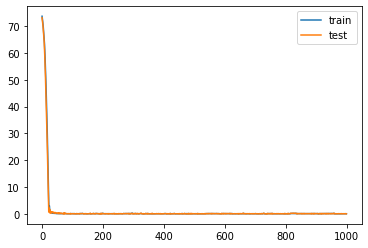

In [53]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Make predictions based on test set and get a root mean squared error 

In [54]:
from sklearn.metrics import mean_squared_error

yhat = lstm_model.predict(test_X)
mse = mean_squared_error(test_y, yhat)
rmse = math.sqrt(mse)

In [55]:
rmse

0.039262390136713066